# Import package library and global parameter settings

In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import linear_model
from sklearn import model_selection   
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score  

In [3]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
dir_open =  r'D:\DoctoralThesis\CorrForScattAna'
dir_write = dir_open

In [5]:
from sklearn.cross_decomposition import PLSRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

# 1 Reading in parameters and setting them

In [6]:
if __name__ == '__main__':
    GDCalCDOM = pd.read_excel(os.path.join(dir_open,"CDOM(88Points)MachineLearningModelCalibration.xlsx"),index_col ='Wavelength')
    GDValCDOM = pd.read_excel(os.path.join(dir_open,"CDOM(88Points)MachineLearningModelValidation.xlsx"),index_col ='Wavelength')
    lenSelectedBandNumCDOM = len(GDCalCDOM.columns)-1
    lenCalSampPointsNumCDOM = len(GDCalCDOM.index)
    lenValSampPointsNumCDOM = len(GDValCDOM.index)
    
    cal_data_inputs_CDOM = np.array(GDCalCDOM.iloc[:,0:lenSelectedBandNumCDOM]).reshape(lenCalSampPointsNumCDOM,lenSelectedBandNumCDOM) 
    val_data_inputs_CDOM = np.array(GDValCDOM.iloc[:,0:lenSelectedBandNumCDOM]).reshape(lenValSampPointsNumCDOM,lenSelectedBandNumCDOM)
    cal_data_outputs_CDOM = np.array(GDCalCDOM['CDOM']).reshape(lenCalSampPointsNumCDOM,1)
    val_data_outputs_CDOM = np.array(GDValCDOM['CDOM']).reshape(lenValSampPointsNumCDOM,1)
        
   
    PLSCDOMreg_params = {'n_components': 6, 'scale': True, 'max_iter': 500, 'tol': 1e-06, 'copy': True} 

    regCDOM = PLSRegression(**PLSCDOMreg_params)    

# GridSearchCV

In [389]:
    cv_params = {'n_components': np.linspace(1,10,10,dtype=int)} 

    other_params =  {'n_components': 2, 'scale': True, 'max_iter': 500, 'tol': 1e-06, 'copy': True} 

    model = PLSRegression(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_absolute_error', refit = True, cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM) 

    evalute_result = optimized_GBM.cv_results_
    
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
每轮迭代运行结果:{'mean_fit_time': array([0.0009974 , 0.00119691, 0.00099368, 0.0009975 , 0.00159559,
       0.00219417, 0.00159574, 0.00219388, 0.00219426, 0.00339203]), 'std_fit_time': array([1.16800773e-07, 3.98851022e-04, 3.86326391e-06, 8.97163759e-07,
       4.88597253e-04, 3.98993503e-04, 4.88519261e-04, 3.98779215e-04,
       3.98945962e-04, 1.01771143e-03]), 'mean_score_time': array([0.0001996 , 0.        , 0.00060005, 0.00079789, 0.00039883,
       0.        , 0.00079784, 0.00039902, 0.00019951, 0.00020022]), 'std_score_time': array([0.00039921, 0.        , 0.00048995, 0.00039895, 0.00048846,
       0.        , 0.00039892, 0.00048869, 0.00039902, 0.00040045]), 'param_n_components': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_components': 1}, {'n_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [401]:
    cv_params = {'tol': np.linspace(0.0001,1,9999)} 

    other_params =  {'n_components': 6, 'scale': True, 'max_iter': 500, 'tol': 1e-06, 'copy': True} 

    model = PLSRegression(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_absolute_error', refit = True, cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 9999 candidates, totalling 49995 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 18424 tasks      | elapsed:   11.4s
[Parallel(n_jobs=4)]: Done 49464 tasks      | elapsed:   30.1s
[Parallel(n_jobs=4)]: Done 49995 out of 49995 | elapsed:   30.4s finished


每轮迭代运行结果:{'mean_fit_time': array([0.00179524, 0.00199418, 0.00199485, ..., 0.0013957 , 0.00139613,
       0.00139623]), 'std_fit_time': array([7.46340219e-04, 8.03580262e-07, 1.50789149e-07, ...,
       4.88228278e-04, 4.88753095e-04, 4.88577726e-04]), 'mean_score_time': array([0.00079837, 0.00059834, 0.00039897, ..., 0.00039911, 0.00079799,
       0.00059824]), 'std_score_time': array([0.00039918, 0.00048854, 0.00048864, ..., 0.00048881, 0.00039899,
       0.00048846]), 'param_tol': masked_array(data=[0.0001, 0.0002000100020004001, 0.00030002000400080014,
                   ..., 0.9997999799959991, 0.9998999899979996, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'tol': 0.0001}, {'tol': 0.0002000100020004001}, {'tol': 0.00030002000400080014}, {'tol': 0.00040003000600120025}, {'tol': 0.0005000400080016003}, {'tol': 0.0006000500100020004}, {'tol': 0.0007000600120024006}, {'tol': 0.000800070014002800

In [402]:
    cv_params = {'max_iter': np.linspace(1,1000,1000,dtype=int)} 

    other_params =  {'n_components': 6, 'scale': True, 'max_iter': 500, 'tol': 1e-06, 'copy': True} 

    model = PLSRegression(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_absolute_error', refit = True, cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.2s


每轮迭代运行结果:{'mean_fit_time': array([0.0017942 , 0.00179501, 0.00219426, 0.00199456, 0.0019968 ,
       0.0017909 , 0.00199451, 0.00179529, 0.00179524, 0.00199447,
       0.00179505, 0.00179543, 0.00199423, 0.00159559, 0.00219421,
       0.00179491, 0.00179534, 0.00139613, 0.0021956 , 0.00179582,
       0.00179582, 0.00199304, 0.00179691, 0.00099669, 0.00199494,
       0.00199461, 0.00119667, 0.00119691, 0.00119686, 0.00199442,
       0.00199475, 0.00199451, 0.00199456, 0.00179524, 0.00199471,
       0.00199456, 0.00139637, 0.00159569, 0.00199471, 0.00199471,
       0.00179515, 0.00119739, 0.0015954 , 0.00159593, 0.00199466,
       0.00219421, 0.00199461, 0.00199466, 0.00199461, 0.00199404,
       0.00159583, 0.0019948 , 0.00139589, 0.00279269, 0.00359035,
       0.00239363, 0.00179529, 0.00319157, 0.00219417, 0.00159574,
       0.00378985, 0.00199428, 0.00179524, 0.00279255, 0.00219417,
       0.00119677, 0.00179515, 0.00398912, 0.00199466, 0.0017952 ,
       0.0017952 , 0.00199509, 0.00

[Parallel(n_jobs=4)]: Done 5000 out of 5000 | elapsed:    3.1s finished


# 2 Fit the model to the data set according to the parameters

In [7]:
PLSCDOMregmodel = regCDOM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM) 
cal_data_outputs_pred_CDOM = PLSCDOMregmodel.predict(cal_data_inputs_CDOM) 
val_data_outputs_pred_CDOM = PLSCDOMregmodel.predict(val_data_inputs_CDOM)
print('cal_data_outputs_pred_CDOM:\n{0}'.format(cal_data_outputs_pred_CDOM)) 
print('val_data_outputs_pred_CDOM:\n{0}'.format(val_data_outputs_pred_CDOM)) 
print(PLSCDOMregmodel.score(cal_data_inputs_CDOM, cal_data_outputs_CDOM))  
print(PLSCDOMregmodel.score(val_data_inputs_CDOM, val_data_outputs_CDOM)) 

cal_data_outputs_pred_CDOM:
[[0.23415908]
 [0.1160811 ]
 [0.12360486]
 [0.26404068]
 [0.2328853 ]
 [0.16932583]
 [0.15761609]
 [0.12142719]
 [0.17466534]
 [0.2188887 ]
 [0.02606553]
 [0.12898632]
 [0.18380168]
 [0.27967551]
 [0.46542846]
 [0.15907685]
 [0.42110182]
 [0.29507878]
 [0.4048699 ]
 [0.05839312]
 [0.22273926]
 [0.42034515]
 [0.07295717]
 [0.30710329]
 [0.21209813]
 [0.23100581]
 [0.30638254]
 [0.40035625]
 [0.44270672]
 [0.64068839]
 [0.39307753]
 [0.56991831]
 [0.51389037]
 [0.4484266 ]
 [0.70675597]
 [0.3240885 ]
 [0.4004899 ]
 [0.27892515]
 [0.33586556]
 [0.64720149]
 [0.33288758]
 [0.49377044]
 [0.79883808]
 [0.45993365]
 [0.5984545 ]
 [0.67434279]
 [0.63857276]
 [0.33272329]
 [0.35637934]
 [0.65403299]
 [0.79435503]
 [0.61067806]
 [0.82539174]
 [0.62118103]
 [0.68458093]
 [1.08431313]
 [1.15473407]
 [1.1904472 ]
 [1.56749541]]
val_data_outputs_pred_CDOM:
[[0.18357963]
 [0.27991618]
 [0.24012552]
 [0.21661538]
 [0.26997191]
 [0.11000643]
 [0.2487592 ]
 [0.07694553]
 [0.2

# 3 Data fitting and prediction effect evaluation

In [8]:
myCalR2_CDOM = r2_score(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM)
print('myCalR2_CDOM:\t{0}'.format(myCalR2_CDOM))
myValR2_CDOM = r2_score(val_data_outputs_CDOM,val_data_outputs_pred_CDOM)
print('myValR2_CDOM:\t{0}'.format(myValR2_CDOM))

myCalMSE_CDOM = mean_squared_error(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM)
print('myCalMSE_CDOM:\t{0}'.format(myCalMSE_CDOM)) 
myValMSE_CDOM = mean_squared_error(val_data_outputs_CDOM,val_data_outputs_pred_CDOM)
print('myValMSE_CDOM:\t{0}'.format(myValMSE_CDOM))

myCalRMSE_CDOM = np.sqrt(mean_squared_error(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM))
print('myCalRMSE_CDOM:\t{0}'.format(myCalRMSE_CDOM))
myValRMSE_CDOM = np.sqrt(mean_squared_error(val_data_outputs_CDOM,val_data_outputs_pred_CDOM))
print('myValRMSE_CDOM:\t{0}'.format(myValRMSE_CDOM)) 

myCalMAE_CDOM = mean_absolute_error(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM)
print('myCalMAE_CDOM:\t{0}'.format(myCalMAE_CDOM))
myValMAE_CDOM = mean_absolute_error(val_data_outputs_CDOM,val_data_outputs_pred_CDOM)
print('myValMAE_CDOM:\t{0}'.format(myValMAE_CDOM)) 

myCalRPD_CDOM = cal_data_outputs_CDOM.std()/myCalRMSE_CDOM
print('myCalRPD_CDOM:\t{0}'.format(myCalRPD_CDOM))
myValRPD_CDOM = val_data_outputs_CDOM.std()/myValRMSE_CDOM
print('myValRPD_CDOM:\t{0}'.format(myValRPD_CDOM))

myCalR2_CDOM:	0.774176365424253
myValR2_CDOM:	0.6359838287779725
myCalMSE_CDOM:	0.026359272183158006
myValMSE_CDOM:	0.04084550259780023
myCalRMSE_CDOM:	0.16235538852516723
myValRMSE_CDOM:	0.20210270309374942
myCalMAE_CDOM:	0.13594034815979486
myValMAE_CDOM:	0.15010238972784704
myCalRPD_CDOM:	2.1043370589661228
myValRPD_CDOM:	1.6574470435074347


In [9]:
from sklearn import linear_model

regrCalCDOM = linear_model.LinearRegression()

regrCalCDOM.fit(cal_data_outputs_CDOM.reshape(lenCalSampPointsNumCDOM,1),
                   np.array(cal_data_outputs_pred_CDOM).reshape(lenCalSampPointsNumCDOM,1))

regrValCDOM = linear_model.LinearRegression()
regrValCDOM.fit(val_data_outputs_CDOM.reshape(lenValSampPointsNumCDOM,1),
                   np.array(val_data_outputs_pred_CDOM).reshape(lenValSampPointsNumCDOM,1))

myCalK_CDOM = "%.2f" %regrCalCDOM.coef_    
myCalIntercept_CDOM = "%.2f" %regrCalCDOM.intercept_    
myValK_CDOM = "%.2f" %regrValCDOM.coef_    
myValIntercept_CDOM = "%.2f" %regrValCDOM.intercept_   

print('myCalK_CDOM:\t{0}'.format(myCalK_CDOM))
print('myValK_CDOM:\t{0}'.format(myValK_CDOM))
print('myCalIntercept_CDOM:\t{0}'.format(myCalIntercept_CDOM))
print('myValIntercept_CDOM:\t{0}'.format(myValIntercept_CDOM))

myCalK_CDOM:	0.77
myValK_CDOM:	0.76
myCalIntercept_CDOM:	0.10
myValIntercept_CDOM:	0.07


# 4 Fitting result scatter plot output

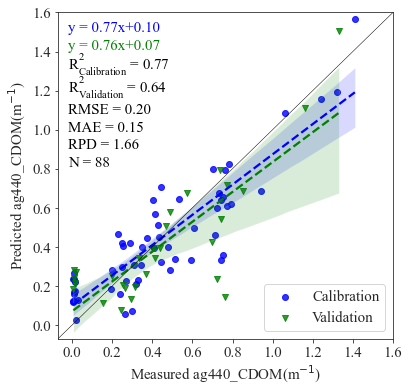

In [14]:
plt.figure(figsize=(6,6))
sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8}) 

sns.regplot(x=cal_data_outputs_CDOM,y=cal_data_outputs_pred_CDOM, marker= 'o',color='blue',scatter=True, fit_reg=True, 
            line_kws={'linestyle':'--','color':'blue'}, 
            label="Calibration",truncate=True,ci=95)
sns.regplot(x=val_data_outputs_CDOM,y=val_data_outputs_pred_CDOM, marker= 'v',color='green',
            line_kws={'linestyle':'--','color':'green'}, 
            label="Validation",truncate=True,ci=95)

plt.xlim((-0.07,1.6))
plt.ylim((-0.07,1.6))
plt.xticks(fontproperties = 'Times New Roman',fontsize = 15)
plt.yticks(fontproperties = 'Times New Roman',fontsize = 15)

z = range(-1,5,1)
plt.plot(z,z,linewidth = 0.5,color = "k")

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('Measured ag440_CDOM(m$^{-1}$)',fontsize=15) 
plt.ylabel('Predicted ag440_CDOM(m$^{-1}$)',fontsize=15) 

plt.text(-0.02,1.5,"y = {k}x+{b}".format(k = myCalK_CDOM,b = myCalIntercept_CDOM), fontproperties = 'Times New Roman',size = 15,
         color = "blue",weight = "light") 
plt.text(-0.02,1.41,"y = {k}x+{b}".format(k = myValK_CDOM,b = myValIntercept_CDOM),fontproperties = 'Times New Roman', size = 15,
         color = "green",weight = "light")
plt.text(-0.02,1.31,"$\mathregular{R^2_{Calibration}}$ = %.2f"%myCalR2_CDOM, fontproperties = 'Times New Roman',size = 15,
         color = "k",weight = "light")
plt.text(-0.02,1.19,"R$\mathregular{^2_{Validation}}$ = %.2f"%myValR2_CDOM, fontproperties = 'Times New Roman',size = 15,
         color = "k",weight = "light")
plt.text(-0.02,1.08,"RMSE = %.2f"%myValRMSE_CDOM, fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")
plt.text(-0.02,0.99,"MAE = %.2f"%myValMAE_CDOM, fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")
plt.text(-0.02,0.90,"RPD = %.2f"%myValRPD_CDOM,fontproperties = 'Times New Roman', size = 15,color = "k",weight = "light")
plt.text(-0.02,0.81,"N = {lenSamplingPointsNumCDOM}".format(lenSamplingPointsNumCDOM = lenCalSampPointsNumCDOM+lenValSampPointsNumCDOM), 
         fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")

plt.legend(loc = 4,fontsize = 15)

plt.savefig(os.path.join(dir_write,'CDOM(88Points)PLSR20240811(n_comp6,scaleTrue,max_iter500,tol1e-06,copyTrue).jpg'),dpi=300,bbox_inches='tight')
plt.show()